Решение SimpleControlProblem непрерывным алгоритмом A3C 

In [ ]:
import torch.nn as nn
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.A2C import A2C_Continuous
from Agents.Utilities.AsynchronousAgentMaker import AsynchronousAgentMaker
from Environments.SimpleControlProblem.SimpleControlProblem import SimpleControlProblem
from Environments.SimpleControlProblem.SimpleControlProblemVisualizer import SimpleControlProblemVisualizer
import Solvers.OneAgentSolver as solver

env = SimpleControlProblem(dt=0.2)

pi_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
v_model = SequentialNetwork([env.state_dim, 128, 1], nn.ReLU())
A2C = A2C_Continuous
agent = A2C(env.action_min, env.action_max, pi_model, v_model,
             gamma=1, pi_model_lr=1e-3, v_model_lr=1e-3, entropy_threshold=0.01)

agent = AsynchronousAgentMaker(agent)

visualizer = SimpleControlProblemVisualizer(waiting_for_show=50)
solver.go_asynchronously(env, agent, episode_n=201, show=visualizer.show, session_len=2500, session_n=10)


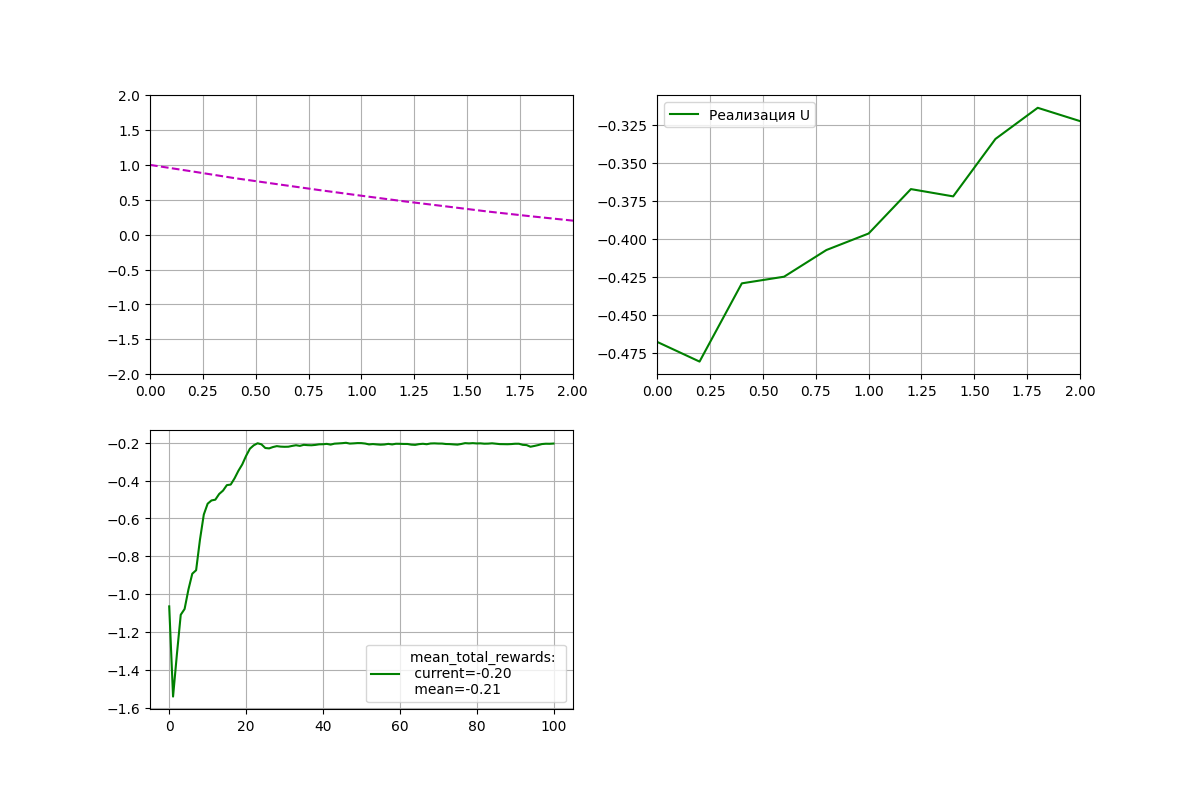